In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a

In [2]:

def generate_random_signal(d, c):
    K = np.random.randint(1, d//2 + 1)
    M = np.random.normal(0, np.sqrt(c))
    L = np.random.normal(0, np.sqrt(d/2 * (1 - c)))
    signal = M * np.ones(d)
    signal[K-1] += L
    signal[K-1 + d//2] += L
    return signal

def generate_random_signals(num_signals,d, c):
    signals = [generate_random_signal(d, c) for _ in range(num_signals)]
    return np.array(signals)

def compute_statistics(signals_array):
    mean = np.mean(signals_array, axis=0)
    covariance = signals_array.T @ signals_array / signals_array.shape[0]
    return mean, covariance

def plotMean(mean, size):
  plt.plot(mean)
  plt.title("Mean signal for size: "+str(size))
  _=plt.show()

def plotCorrelation(autocorr, size):
  _ = plt.imshow(autocorr)
  _ = plt.colorbar()
  _ = plt.title("Autocorrelation matrix for size: "+str(size))

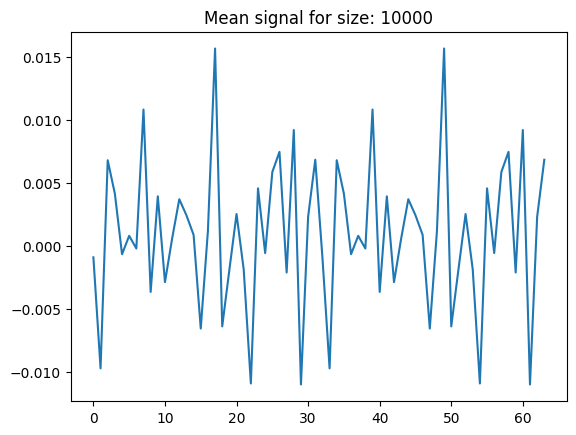

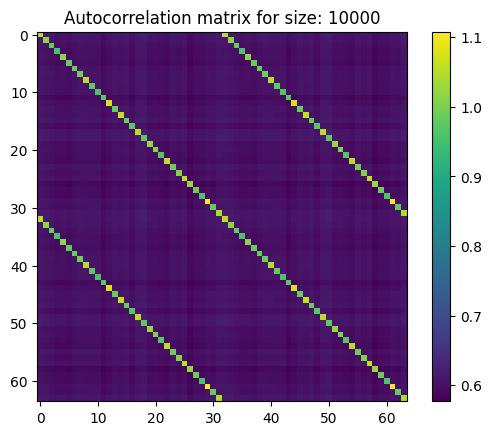

In [3]:
# Constants
d = 64
c = 0.6
n_samples = 10000
signals = generate_random_signals(n_samples, d, c)
mean,cov = compute_statistics(signals)

# Plotting the empirical mean
plotMean(mean,n_samples )

# Plotting the empirical autocorrelation matrix
plotCorrelation(cov,n_samples)

# b

In [4]:
def wienerFilter(R_phi,H, R_noise):
  H_hermit = H.conj().T
  W = R_phi @ H_hermit @ np.linalg.inv(H @ R_phi @ H_hermit + R_noise)
  return W
def plotwienerFilter(W):
  _ = plt.imshow(W)
  _ = plt.colorbar()
  _ = plt.title("Wiener Filter")

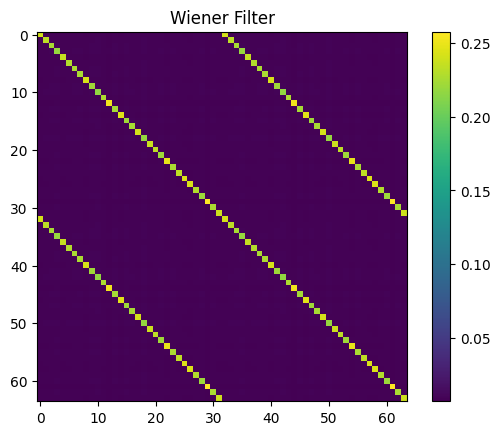

In [5]:
#b
R_phi=cov
I=np.eye(d)
R_noise=np.eye(d)
W_b=wienerFilter(R_phi,I, R_noise)
plotwienerFilter(W_b)


In [6]:
def compare_singals(signals, noised_signals, denoised_signals, indices_array):
  mse = np.mean((signals-denoised_signals)**2)
  for num,i in enumerate(indices_array):
      phi_clean = signals[i]
      phi_noisy = noised_signals[i]
      phi_denoised = denoised_signals[i]
      mse_local = np.mean((phi_clean-phi_denoised)**2)
      plt.figure(figsize=(10, 6))
      plt.plot(phi_clean, label='Clean Signal')
      plt.plot(phi_noisy, label='Noisy Signal')
      plt.plot(phi_denoised, label='Denoised Signal')
      plt.legend()
      plt.title(f'Signal Denoising Example {num}. MSE: {mse_local}')
      plt.show()
  print(f'Average MSE: {mse}')


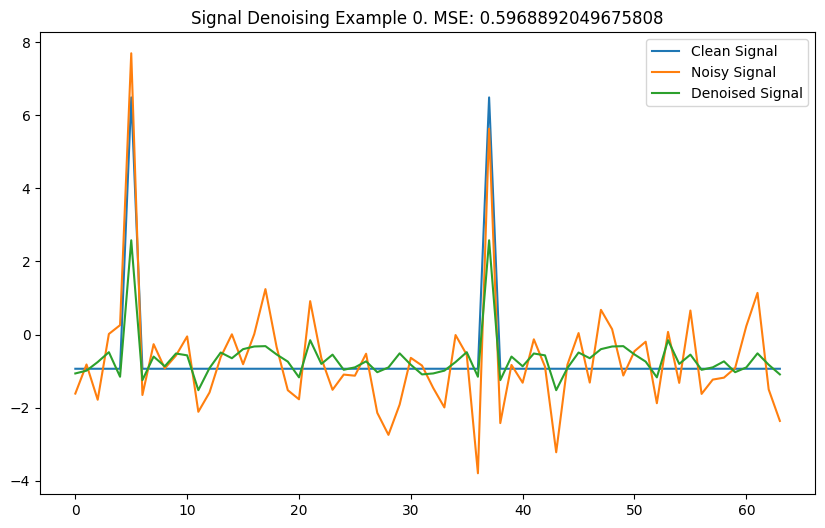

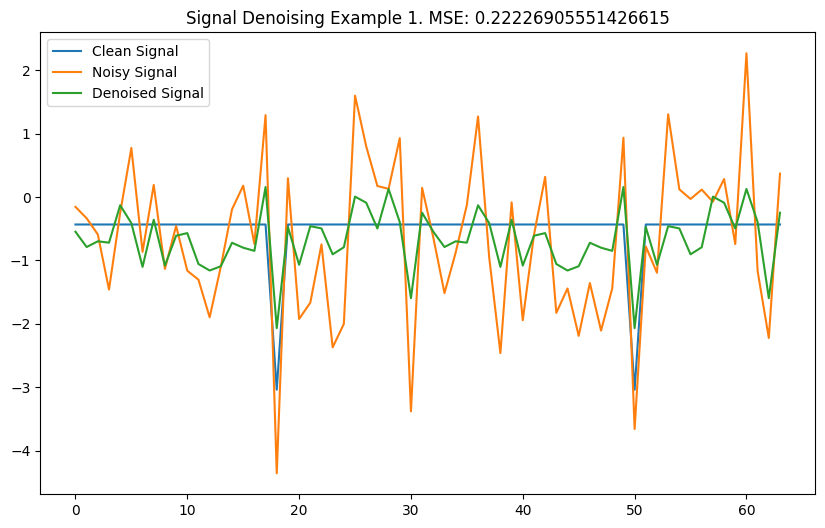

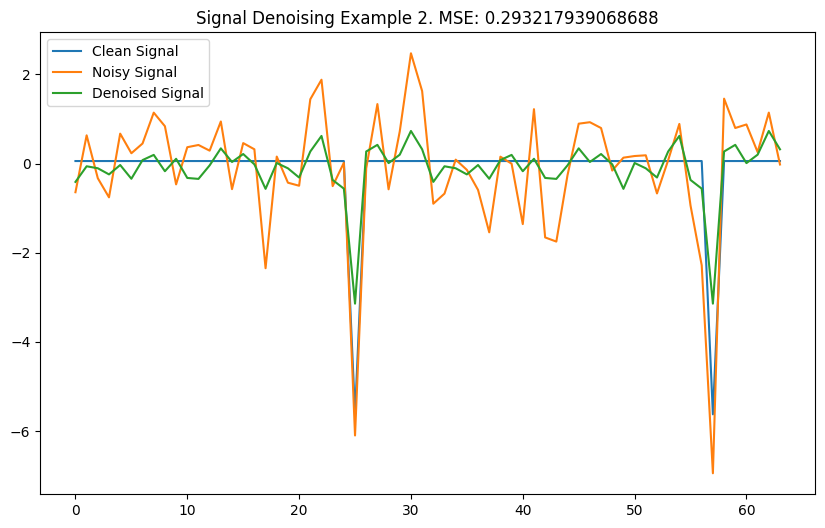

Average MSE: 0.23152268336681642


In [7]:
#b
noise_matrix=np.random.normal(size=signals.shape)
noisy_singals_b = signals + noise_matrix
denoised_signals_b = (W_b @(noisy_singals_b.T)).T

compare_singals(signals, noisy_singals_b, denoised_signals_b, [10,100,1000])


# c

In [8]:
#c
from scipy.linalg import circulant
def compute_H(dim):
  first_row = np.zeros(dim)
  first_row[0] = -5/2
  first_row[1] = 4/3
  first_row[2] = -1/12
  first_row[-1] = 4/3
  first_row[-2] = -1/12


  H = circulant(first_row)
  return H

def plotH(H):
  _ = plt.imshow(H)
  _ = plt.colorbar()
  _ = plt.title("H Operator")

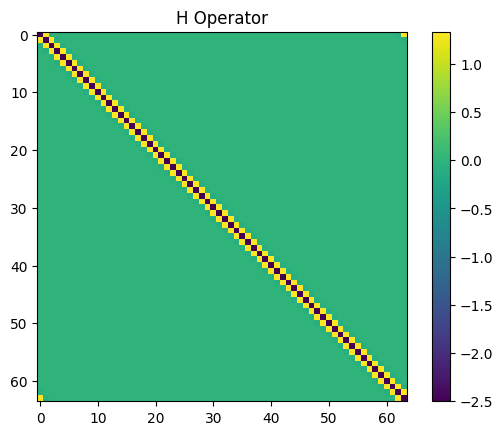

In [9]:
#c
H=compute_H(d)
plotH(H)


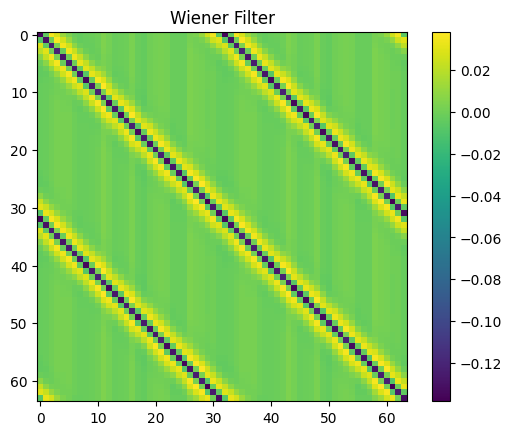

In [10]:
W_c=wienerFilter(R_phi,H, R_noise)
plotwienerFilter(W_c)

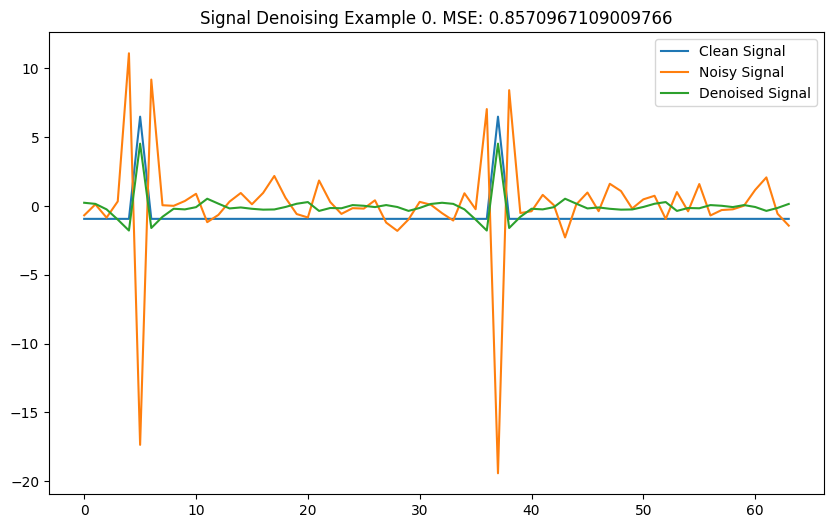

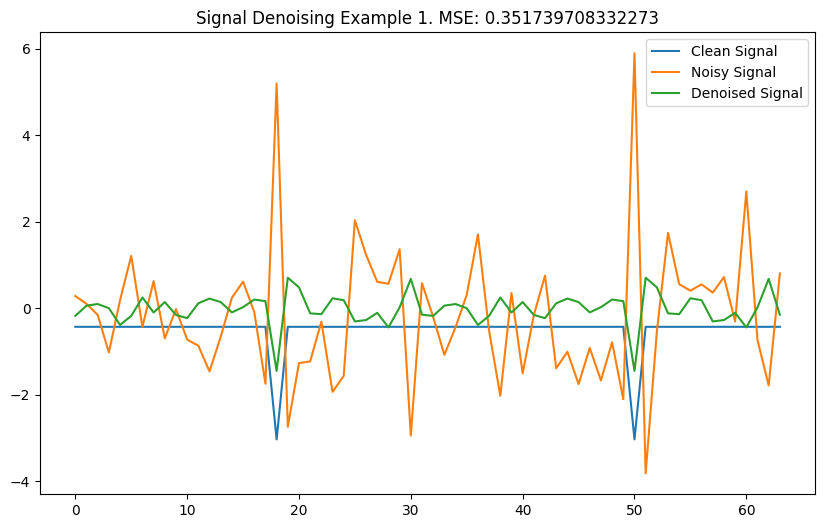

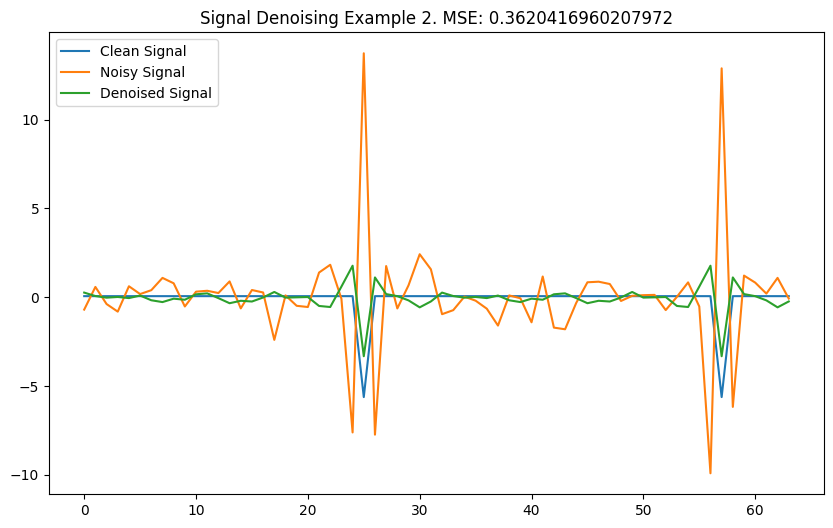

Average MSE: 0.7532839575740123


In [11]:
#c
noisy_singals_c = signals@H.T + noise_matrix
denoised_signals_c = (W_c @(noisy_singals_c.T)).T

compare_singals(signals, noisy_singals_c, denoised_signals_c, [10,100,1000])

# d

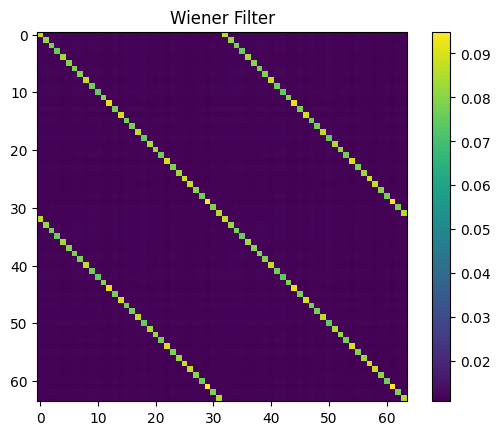

In [12]:
#d- repeat b
R_phi=cov
I=np.eye(d)
R_noise_d=5*np.eye(d)
W_d_b=wienerFilter(R_phi,I, R_noise_d)
plotwienerFilter(W_d_b)


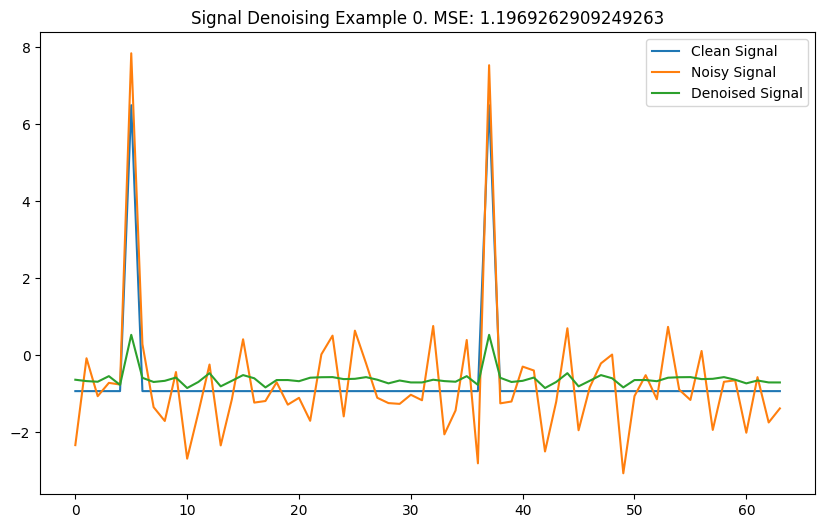

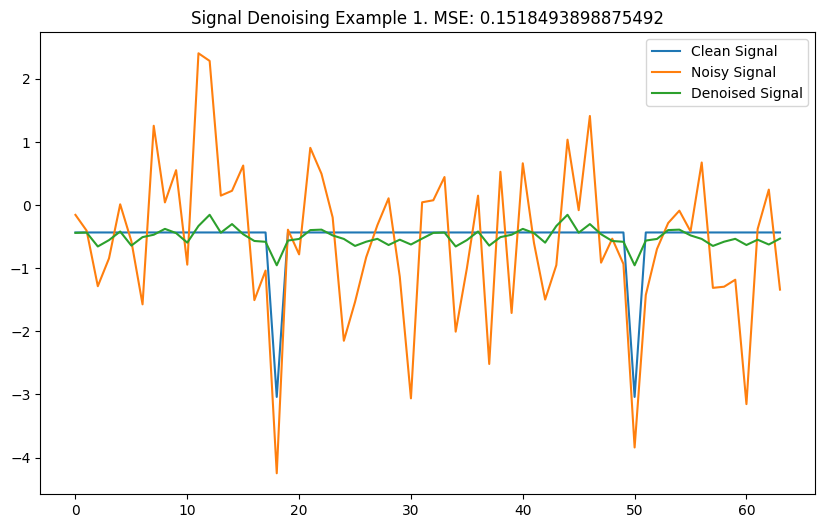

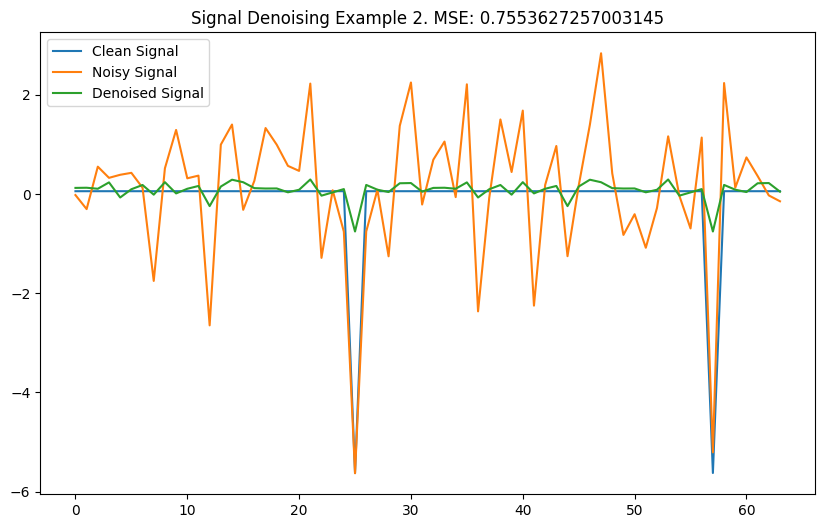

Average MSE: 0.3207027378912244


In [13]:

noise_matrix_d=np.random.normal(size=signals.shape)
noisy_singals_d_b = signals + noise_matrix_d
denoised_signals_d_b = (W_d_b @(noisy_singals_d_b.T)).T
compare_singals(signals, noisy_singals_d_b, denoised_signals_d_b , [10,100,1000])

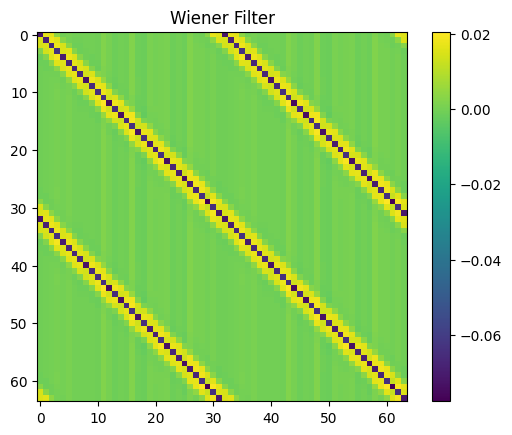

In [14]:
#d - repeating c
H_d_c=compute_H(d)
W_d_c=wienerFilter(R_phi,H_d_c, R_noise_d)
plotwienerFilter(W_d_c)


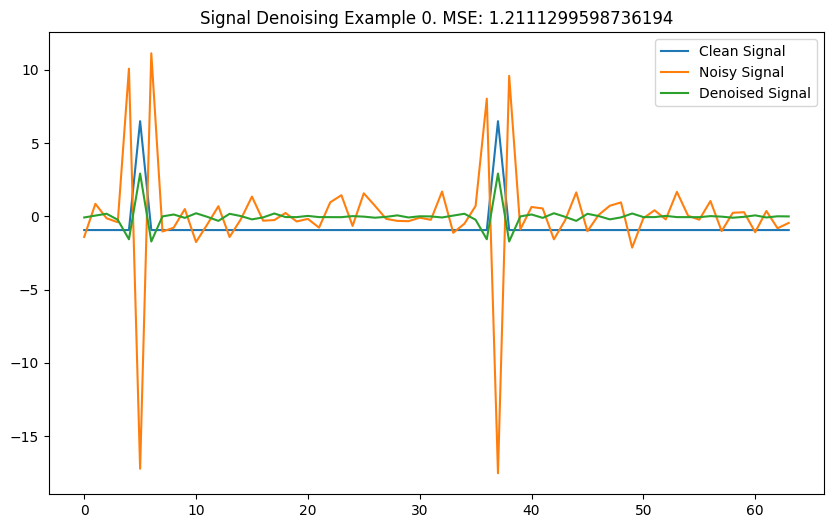

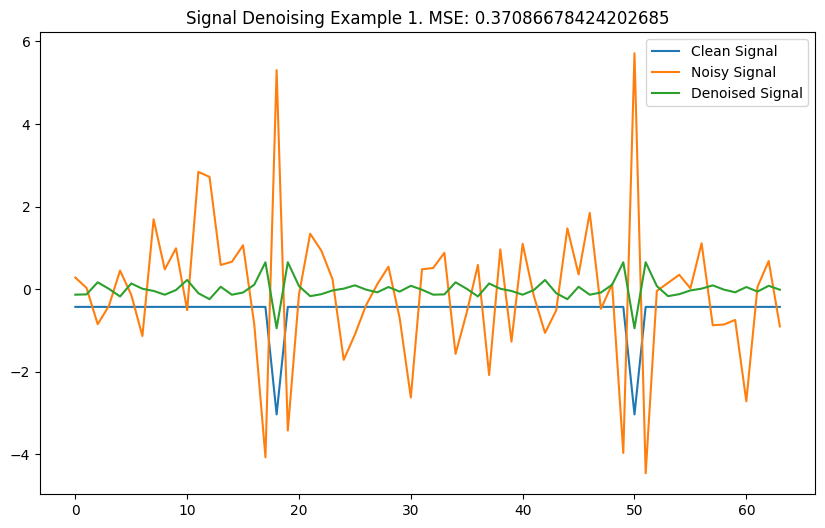

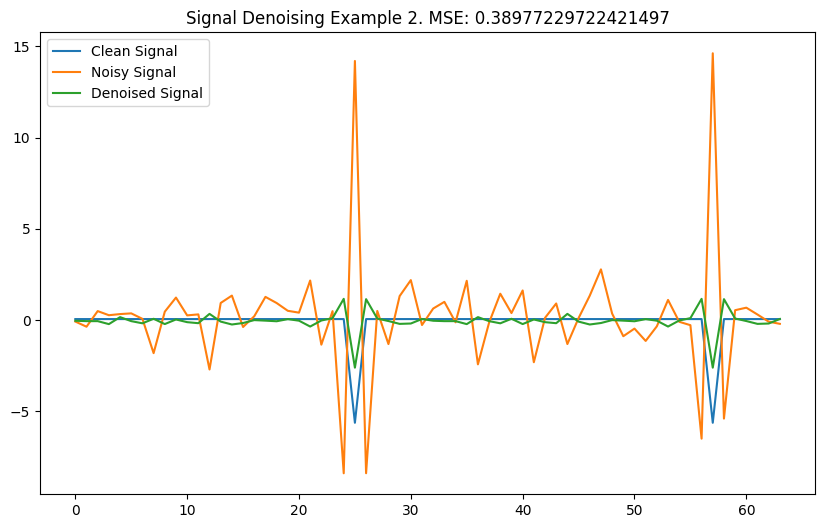

Average MSE: 0.7873452364667322


In [15]:
#repeat c
noisy_singals_d_c = signals@H.T + noise_matrix_d
denoised_signals_d_c = (W_d_c @(noisy_singals_d_c.T)).T

compare_singals(signals, noisy_singals_d_c, denoised_signals_d_c, [10,100,1000])

# e

In [16]:

from scipy.linalg import dft

def pseudo_inverse_cirrculant(H):
    dim = H.shape[0]
    F = dft(dim)
    eigenvalues = np.fft.fft(H[0])
    eigenvalues_pinv = np.zeros_like(eigenvalues, dtype=np.complex_)
    for i in range(len(eigenvalues)):
        if np.abs(eigenvalues[i]) > 1e-10:  # Avoid division by zero
            eigenvalues_pinv[i] = 1.0 / eigenvalues[i]
        else:
            eigenvalues_pinv[i] = 0.0
    Lambda_pinv = np.diag(eigenvalues_pinv)
    H_pseudo_inv = np.conj(F.T) @ Lambda_pinv @ F / dim
    assert(np.allclose(np.linalg.pinv(H), H_pseudo_inv))
    return H_pseudo_inv

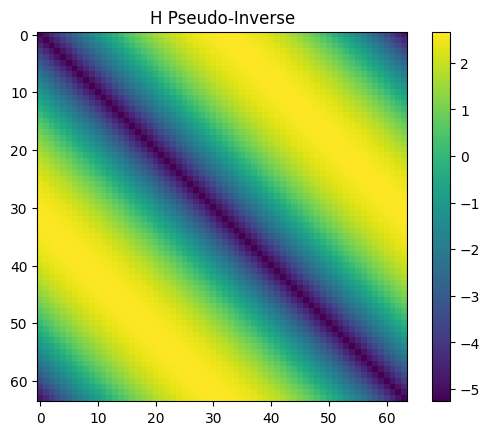

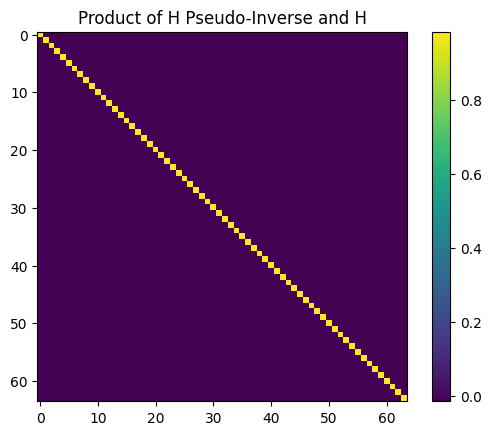

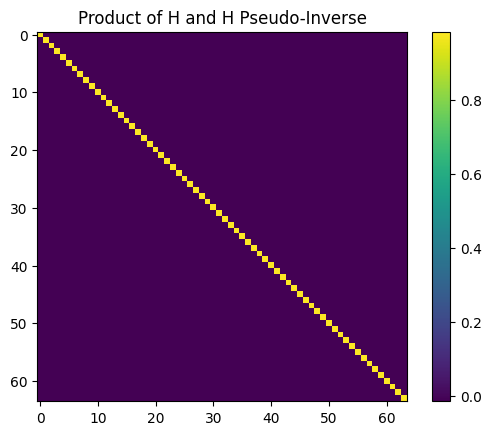

In [17]:
H_e=compute_H(d)
H_pseudo_inv=pseudo_inverse_cirrculant(H_e)
H_pseudo_inv = np.real(H_pseudo_inv)
plt.imshow(H_pseudo_inv)
plt.title("H Pseudo-Inverse")
plt.colorbar()
plt.show()

plt.imshow(H_pseudo_inv@H_e)
plt.title("Product of H Pseudo-Inverse and H")
plt.colorbar()
plt.show()

plt.imshow(H_e@H_pseudo_inv)
plt.title("Product of H and H Pseudo-Inverse")
plt.colorbar()
plt.show()


Euclidean Norm phi1- phi2: 256.0
Euclidean Norm phi1- phi2: 3.204732678619319e-11


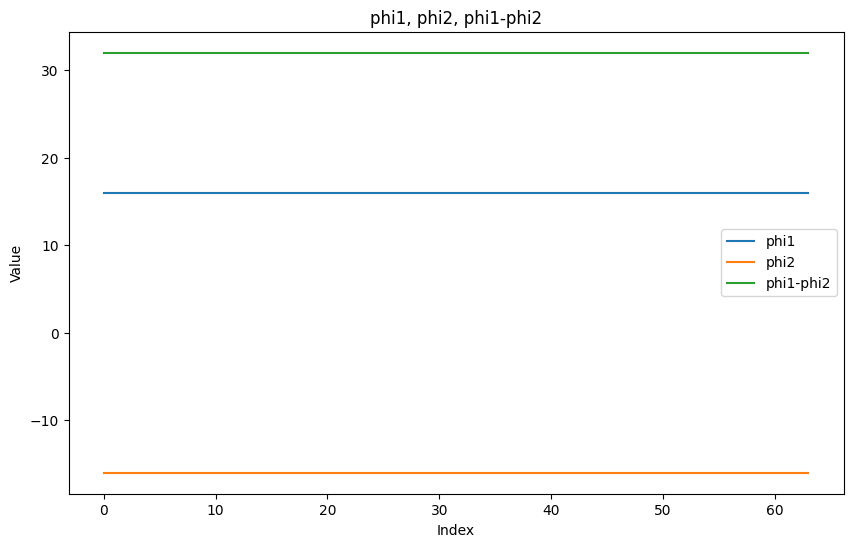

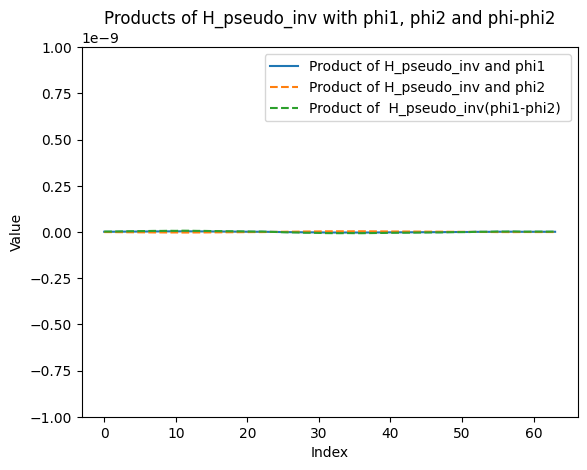

In [18]:
phi1 = 16*np.ones(64)
phi2 = -16*np.ones(64)
product1 = H_pseudo_inv@phi1
product2 = H_pseudo_inv@phi2

euclidean_norm_before = np.linalg.norm(phi1-phi2)
print("Euclidean Norm phi1- phi2:", euclidean_norm_before)

euclidean_norm_after = np.linalg.norm(product1-product2)
print("Euclidean Norm phi1- phi2:", euclidean_norm_after)

# Plot the results
plt.figure(figsize=(10, 6))
plt.xlabel("Index")
plt.ylabel("Value")

plt.title("phi1, phi2, phi1-phi2")
plt.plot(phi1, label='phi1')
plt.plot(phi2, label='phi2')
plt.plot(phi1-phi2, label='phi1-phi2')
plt.legend()
plt.show()


plt.plot(product1, label='Product of H_pseudo_inv and phi1')
plt.plot(product2, label='Product of H_pseudo_inv and phi2', linestyle='--')
plt.plot(product1-product2, label='Product of  H_pseudo_inv(phi1-phi2) ', linestyle='--')

plt.title("Products of H_pseudo_inv with phi1, phi2 and phi-phi2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.ylim(-1e-9, 1e-9)

plt.show()